In [1]:
import pandas as pd
import numpy as np
import os

# read preprocessed data
cwd = os.getcwd()
df = pd.read_csv(cwd + "/data_csv/preprocessing_data.csv")
df.to_csv(cwd + "/data_csv/feature_data.csv", index=False)

In [2]:
df.groupby('emotion').count()

df

,image,emotion
0,facial-expressions_2868585k.jpg,7
1,facial-expressions_2868582k.jpg,3
2,Aaron_Peirsol_0003.jpg,4
3,Aaron_Sorkin_0002.jpg,4
4,Abdel_Nasser_Assidi_0002.jpg,5
...,...,...
24108,SURPRISE/surprise (971).png,7
24109,SURPRISE/surprise (978).jpg,7
24110,SURPRISE/surprise (981).png,7
24111,SURPRISE/surprise (983).jpg,7


In [3]:
def get_distance(fist_point, second_point):
    distance =  math.sqrt(math.pow(fist_point[0] - second_point[0], 2) + math.pow(fist_point[1] - second_point[1], 2))
    return abs(distance)

def get_angle(first_point, second_point):
    value = (second_point[1] - first_point[1]) / (second_point[0] - first_point[0])
    angle = math.atan(value)
    return angle

len(df)


24113

In [4]:
import cv2, math, numpy as np, dlib
from imutils import face_utils

detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor(cwd + "/predictor/shape_predictor_68_face_landmarks.dat")

mlist = []
distlist = []
eye_size_list = []
eye_brows_list = []
width_left_eyes =[]
width_right_eyes = []
width_mount = []
height_mount = []
height_mount_chin = []
left_eye_list = []
right_eye_list = []
angle_left_eyebrow = []
angle_right_eyebrow = []
dis_c_lmount_nose = []
dis_c_rmount_nose = []
d_first_eyebrow_leye = []
d_first_eyebrow_reye = []
a_nose_leyebrow = []
a_nose_reyebrow = []
circum_mount = []
d_bottom_mount_chin = []


emotion_list = [0 for x in range(8)]


error = []

# run each row in train.csv
for idx, row in df.iterrows():
    try:
        imagePath = cwd + "/cleaned_images/" + row.image
        image = cv2.imread(imagePath)

        rects = detector(image, 0)

        xlist = []
        ylist = []
        if(emotion_list[row.emotion] > 500):
            error.append(idx)
            continue
        # loop over the face detections
        for (i, rect) in enumerate(rects):
            # determine the facial landmarks and convert the facial landmark (x, y)
            shape = predictor(image, rect)
            shape = face_utils.shape_to_np(shape)

            # loop over coordinates, draw them on the image and store coordinates in two lists
            for (x, y) in shape:
                cv2.circle(image, (x, y), 2, (0, 255, 0), -1)
                xlist.append(x)
                ylist.append(y)

        # get mean of both axes to determine centre of gravity
        xmean = np.mean(xlist) 
        ymean = np.mean(ylist)

        # plot central face on image
        cv2.circle(image, (int(xmean), int(ymean)), 1, (0, 255, 0), -1)

        # find distance between mouth
        mavg = np.mean([ylist[61] - ylist[67], ylist[62] - ylist[66], ylist[63] - ylist[65]])

        # find distance between left eye
        left_eye_avg = np.mean([
            get_distance([xlist[37], ylist[37]], [xlist[40], ylist[40]]),
            get_distance([xlist[38], ylist[38]], [xlist[41], ylist[41]])
        ])
        # find distance between right eye
        right_eye_avg = np.mean([
            get_distance([xlist[43], ylist[43]], [xlist[46], ylist[46]]),
            get_distance([xlist[44], ylist[44]], [xlist[47], ylist[47]])
        ])
        # find distance between eye browns
        eye_brows = np.mean([ylist[24] - ylist[26], ylist[19] - ylist[17]])

        # find distance between every poin to central point
        templist = []
        for i in range(17, 68):
            dist = math.sqrt(math.pow(xlist[i] - xmean, 2) + math.pow(ylist[i] - ymean, 2))
            templist.append(dist)
        distavg = np.mean(dist)
        
        mlist.append(mavg) # 1
        left_eye_list.append(left_eye_avg)
        right_eye_list.append(right_eye_avg)
        width_left_eyes.append(get_distance([xlist[36], ylist[36]], [xlist[39], ylist[39]]))
        width_right_eyes.append(get_distance([xlist[42], ylist[42]], [xlist[45], ylist[45]]))
        width_mount.append(get_distance([xlist[48], ylist[48]], [xlist[54], ylist[54]]))
        height_mount.append(get_distance([xlist[51], ylist[51]], [xlist[57], ylist[57]]))
        height_mount_chin.append(get_distance([xlist[51], ylist[51]], [xlist[8], ylist[8]]))
        angle_left_eyebrow.append(get_angle([xlist[17], ylist[17]], [xlist[18], ylist[18]]))
        angle_right_eyebrow.append(get_angle([xlist[26], ylist[26]], [xlist[25], ylist[25]]))
        eye_brows_list.append(eye_brows)
        dis_c_lmount_nose.append(get_distance([xlist[33], ylist[33]], [xlist[48], ylist[48]]))
        dis_c_rmount_nose.append(get_distance([xlist[33], ylist[33]], [xlist[54], ylist[54]]))
        d_first_eyebrow_leye.append(get_distance([xlist[21], ylist[21]], [xlist[39], ylist[39]]))
        d_first_eyebrow_reye.append(get_distance([xlist[22], ylist[22]], [xlist[42], ylist[42]]))
        a_nose_leyebrow.append(get_angle([xlist[21], ylist[21]], [xlist[27], ylist[27]]))
        a_nose_reyebrow.append(get_angle([xlist[42], ylist[42]], [xlist[22], ylist[22]]))
        distlist.append(distavg) 
        circum_mount.append([get_distance([xlist[x], ylist[x]], [xlist[x + 1], ylist[x + 1]]) for x in range(60, 67)])
        d_bottom_mount_chin.append(get_distance([xlist[57], ylist[57]], [xlist[8], ylist[8]]))
        emotion_list[row.emotion] += 1
        cv2.imshow("Output", image)# 
        k = cv2.waitKey(5) & 0xFF
        if k == 68:
            break
        # 20
    except:
        error.append(idx)
        continue

/var/folders/dj/6xj2_ws50cn8fvd7lpqt77l80000gn/T/ipykernel_49307/3441831444.py:6: RuntimeWarning: divide by zero encountered in long_scalars
  value = (second_point[1] - first_point[1]) / (second_point[0] - first_point[0])
/usr/local/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.9/site-packages/numpy/core/_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [ ]:
df
new_df = df.copy()
print(len(new_df))
print(len(error))

24113
40


In [ ]:
df.drop(error, axis=0, inplace=True)
print(len(df))

24073


40


In [ ]:
# add feature to df
print(len(df), len(mlist))
df['mouth_distance'] = mlist # 1
df['average_distance'] = distlist
df['size_left_eye'] = left_eye_list
df['size_right_eye']  = right_eye_list
# print(len(eye_brows_list))
df['eye_brows'] = eye_brows_list
df['w_left_eye'] = width_left_eyes
df['w_right_eye'] = width_right_eyes
df['w_mount'] = width_mount
df['h_mount'] = height_mount
df['h_chin'] = height_mount_chin
# print(len(angle_left_eyebrow))
df['angle_left_eyebrow'] = angle_left_eyebrow
df['angle_right_eyebrow'] = angle_right_eyebrow
df['dis_c_lmount_nose'] = dis_c_lmount_nose
df['dis_c_rmount_nose'] = dis_c_rmount_nose 
df['d_first_eyebrow_leye'] = d_first_eyebrow_leye
df['d_first_eyebrow_reye'] = d_first_eyebrow_reye
df['a_nose_leyebrow'] = a_nose_leyebrow
df['a_nose_reyebrow'] = a_nose_reyebrow
df['circum_mount'] = circum_mount
df['d_bottom_mount_chin'] = d_bottom_mount_chin
# 20 Features


24073 24073


In [ ]:
df

,image,emotion,mouth_distance,average_distance,size_left_eye,size_right_eye,w_left_eye,w_right_eye,w_mount,h_mount,...,angle_left_eyebrow,angle_right_eyebrow,dis_c_lmount_nose,dis_c_rmount_nose,d_first_eyebrow_leye,d_first_eyebrow_reye,a_nose_leyebrow,a_nose_reyebrow,circum_mount,d_bottom_mount_chin
0,facial-expressions_2868585k.jpg,7,-28.666667,57.849661,20.048945,19.091883,38.639358,36.055513,79.101201,53.084838,...,-0.602287,0.741947,54.083269,48.083261,29.068884,28.460499,0.835357,1.249046,"[26.570660511172846, 11.0, 12.0, 22.4722050542...",27.073973
1,facial-expressions_2868582k.jpg,3,-3.000000,38.702801,17.693473,16.741736,37.336309,36.055513,86.000000,23.021729,...,-0.531724,0.702257,51.429563,46.141088,24.839485,24.698178,0.682317,1.016489,"[27.0, 11.045361017187261, 12.041594578792296,...",31.064449
2,Aaron_Peirsol_0003.jpg,4,-13.333333,48.809134,14.317438,14.932573,32.015621,31.400637,87.464278,31.144823,...,-0.785398,0.785398,50.159745,42.449971,25.495098,23.769729,0.680521,1.315614,"[28.071337695236398, 13.038404810405298, 12.36...",44.553339
3,Aaron_Sorkin_0002.jpg,4,-20.000000,54.846611,15.636488,15.273360,39.319207,39.000000,113.357840,43.104524,...,-0.745419,0.748378,57.271284,60.745370,21.954498,25.553865,0.785398,1.037088,"[32.0624390837628, 16.492422502470642, 18.0277...",37.121422
4,Abdel_Nasser_Assidi_0002.jpg,5,1.666667,37.752899,15.811388,16.428563,34.785054,33.955854,67.357256,19.313208,...,-0.558599,1.158386,43.462628,44.944410,27.658633,25.709920,1.147942,1.335251,"[19.4164878389476, 8.94427190999916, 9.0553851...",51.662365
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24108,SURPRISE/surprise (971).png,7,-3.333333,44.369616,24.768364,26.208735,47.042534,49.091751,96.000000,34.000000,...,-1.022247,0.935770,59.033889,62.201286,47.095647,50.219518,0.892677,1.349968,"[27.202941017470888, 12.041594578792296, 13.03...",45.398238
24109,SURPRISE/surprise (978).jpg,7,-19.666667,63.395024,18.207012,17.859781,38.000000,36.221541,66.121101,51.000000,...,-0.927295,0.938047,51.224994,49.517674,37.483330,39.293765,0.933248,1.313473,"[19.72308292331602, 10.0, 11.180339887498949, ...",25.079872
24110,SURPRISE/surprise (981).png,7,-47.666667,75.326098,20.890573,21.360331,38.013156,41.000000,89.358827,71.344236,...,-0.876058,0.588003,51.613952,68.095521,25.079872,30.000000,0.694738,0.927295,"[27.586228448267445, 11.045361017187261, 13.03...",21.931712
24111,SURPRISE/surprise (983).jpg,7,-23.333333,65.942962,24.062410,23.693433,43.104524,45.044423,80.024996,55.009090,...,-1.107149,1.046001,58.137767,59.396970,43.011626,43.566042,0.856706,1.409421,"[24.186773244895647, 11.0, 12.041594578792296,...",22.203603


In [ ]:
df.groupby('emotion').count()

,image,mouth_distance,average_distance,size_left_eye,size_right_eye,w_left_eye,w_right_eye,w_mount,h_mount,h_chin,...,angle_left_eyebrow,angle_right_eyebrow,dis_c_lmount_nose,dis_c_rmount_nose,d_first_eyebrow_leye,d_first_eyebrow_reye,a_nose_leyebrow,a_nose_reyebrow,circum_mount,d_bottom_mount_chin
emotion,,,,,,,,,,,,,,,,,,,,,
0,2517,2517,2517,2517,2517,2517,2517,2517,2517,2517,...,2517,2517,2517,2517,2517,2517,2517,2517,2517,2517
1,1677,1677,1677,1677,1677,1677,1677,1677,1677,1677,...,1677,1677,1677,1677,1677,1677,1677,1677,1677,1677
2,1566,1566,1566,1566,1566,1566,1566,1566,1566,1566,...,1566,1566,1566,1566,1566,1566,1566,1566,1566,1566
3,1994,1994,1994,1994,1994,1994,1994,1994,1994,1994,...,1994,1994,1994,1994,1994,1994,1994,1994,1994,1994
4,6387,6387,6387,6387,6387,6387,6387,6387,6387,6387,...,6387,6387,6387,6387,6387,6387,6387,6387,6387,6387
5,5378,5378,5378,5378,5378,5378,5378,5378,5378,5378,...,5378,5378,5378,5378,5378,5378,5378,5378,5378,5378
6,2268,2268,2268,2268,2268,2268,2268,2268,2268,2268,...,2268,2268,2268,2268,2268,2268,2268,2268,2268,2268
7,2286,2286,2286,2286,2286,2286,2286,2286,2286,2286,...,2286,2286,2286,2286,2286,2286,2286,2286,2286,2286


In [ ]:
from matplotlib import pyplot as plt
def scree_plot(X, n_components, with_cumulative=False, show_data_label=False, figsize=(10, 7)):
    '''
    PCA scree plot with cumulative
    '''
    scaler = StandardScaler()
    X_t=scaler.fit_transform(X)

    max_components = min(X.shape)
    x=np.arange(1, n_components+1)
    pca = PCA(n_components=max_components)
    pca.fit_transform(X_t)
    y1=pca.explained_variance_ratio_[:n_components]
    y2=np.cumsum(pca.explained_variance_ratio_)[:n_components]
    
    plt.figure(figsize=figsize)
    
    if n_components > 20:
        marker = None
    else:
        marker = 'o'
    if with_cumulative:
        plt.plot(x, y2, linestyle='--', marker=marker, label='cumulative', color='salmon')
        
    plt.plot(x, y1, linestyle='-', marker=marker, label='individual', color='deepskyblue')
    plt.title('explained variance ratio')
    plt.xlabel('Number of components')
    plt.ylabel('proportion of variance explained')
    plt.legend()
    if with_cumulative:
        [plt.axhline(y=xl, color='.7', linestyle='--') for xl in [.8, .9, .95, 1]]
    plt.grid(axis='x')

    if show_data_label:
        for n, v, cv in zip(np.nditer(x, flags=['refs_ok']), 
                            np.nditer(y1, flags=['refs_ok']),
                            np.nditer(y2, flags=['refs_ok'])):
                plt.text(n+.02, v+.02, f'{v*100:.2f}%', fontsize=10)
                if with_cumulative:
                    plt.text(n+.02, cv+.02, f'{cv*100:.2f}%', fontsize=10)

20


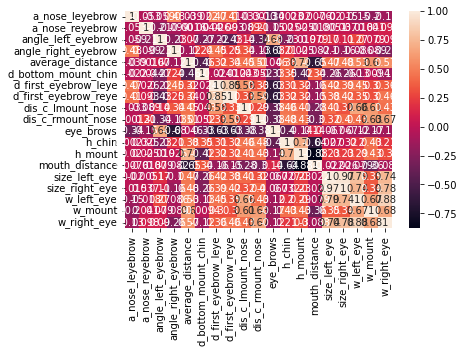

In [ ]:
import seaborn as sns
X = df[df.columns.difference(['Unnamed: 0', 'emotion', 'image'])]
corr = X.corr()

sns.heatmap(corr, annot=True)
print(len(X.columns))


In [ ]:
columns = np.full((corr.shape[0],), True, dtype=bool)
for i in range(corr.shape[0]):
    for j in range(i+1, corr.shape[0]):
        if corr.iloc[i,j] >= 0.9:
            if columns[j]:
                columns[j] = False

selected_columns = corr.columns[columns]
data = corr[selected_columns]
print(len(data.columns))


18


In [ ]:
df.columns

Index(['image', 'emotion', 'mouth_distance', 'average_distance',
       'size_left_eye', 'size_right_eye', 'w_left_eye', 'w_right_eye',
       'w_mount', 'h_mount', 'h_chin', 'eye_brows', 'angle_left_eyebrow',
       'angle_right_eyebrow', 'dis_c_lmount_nose', 'dis_c_rmount_nose',
       'd_first_eyebrow_leye', 'd_first_eyebrow_reye', 'a_nose_leyebrow',
       'a_nose_reyebrow', 'circum_mount', 'd_bottom_mount_chin'],
      dtype='object')

In [ ]:
# Critical To Model
from sklearn.ensemble import RandomForestClassifier
model= RandomForestClassifier(n_estimators=250, random_state=7)
X=df[df.columns.difference(['emotion', 'image'])]
y = df[['emotion']]
print(y)
model.fit(X,y)  

       emotion
0            7
1            3
2            4
3            4
4            5
...        ...
24108        7
24109        7
24110        7
24111        7
24112        7

[24073 rows x 1 columns]


In [ ]:
fs=pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=True)

fs.plot(kind='barh')

In [ ]:
import statsmodels.api as sm
from sklearn.feature_selection import RFE

X_1 = sm.add_constant(X)
model = sm.OLS(y,X_1).fit()
model.pvalues



In [ ]:
# 2. Wrapper Methods
cols = list(X.columns)
pmax = 1
while (len(cols)>0):
    p= []
    X_1 = X[cols]
    X_1 = sm.add_constant(X_1)
    model = sm.OLS(y,X_1).fit()
    p = pd.Series(model.pvalues.values[1:],index = cols)      
    pmax = max(p)
    feature_with_p_max = p.idxmax()
    if(pmax>0.05):
        cols.remove(feature_with_p_max)
    else:
        break
selected_features_BE = cols
print(selected_features_BE)

In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
print(X)
#Initializing RFE model
rfe = RFE(model, n_features_to_select=7)
#Transforming data using RFE
X_rfe = rfe.fit_transform(X,y) 
model.fit(X_rfe,y)
print(rfe.support_)
print(rfe.ranking_)

In [ ]:
#no of features
nof_list=np.arange(1,13)            
high_score=0
#Variable to store the optimum features
nof=0           
score_list =[]
for n in range(len(nof_list)):
    X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.1, random_state = 0)
    model = LinearRegression()
    rfe = RFE(model, n_features_to_select=nof_list[n])
    X_train_rfe = rfe.fit_transform(X_train,y_train)
    X_test_rfe = rfe.transform(X_test)
    model.fit(X_train_rfe,y_train)
    score = model.score(X_test_rfe,y_test)
    score_list.append(score)
    if(score>high_score):
        high_score = score
        nof = nof_list[n]
print("Optimum number of features: %d" %nof)
print("Score with %d features: %f" % (nof, high_score))

In [ ]:
model.feature_importances_

In [ ]:
# Plot PCA Graph

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
pca = PCA(n_components=4)
X_t = scaler.fit_transform(X)
pca.fit_transform(X_t)
scree_plot(X, 4, True, True, (20 , 7))
cols=['average_distance', 'eye_brows', 'eye_size', 'mouth_distance']
print(pca.components_.shape)
dpc=pd.DataFrame(pca.components_.T, 
                  index=cols, 
                  columns=[f'PC{n+1}' for n in range(pca.components_.shape[0])]).round(4) #Eigenvectors
                  
# dpc
dpc.style.applymap(lambda e: 'background-color: gray' if e > .5 else 'background-color: dark-white')

In [ ]:
# Wrapper Methods
